## 🔍 Project Overview

This notebook demonstrates a **wheelchair-accessible pathfinding system** designed using computational intelligence principles.  
We implement and compare **Basic A\***, **Enhanced A\***, and **Dijkstra's algorithm** on a custom-built map with real-world coordinates and accessibility metadata.  
The system supports live GUI interaction, visual feedback, and accessibility-aware heuristics.


## 🚀 Key Algorithms Explained

- **Basic A\***: Uses straight-line (Haversine) distance as the heuristic.
- **Enhanced A\***: Integrates environmental features like **slope**, **surface type**, and **ramp availability**.
- **Dijkstra**: Explores all paths without a heuristic; serves as a baseline for evaluating efficiency and accuracy.


In [320]:
# Required Libraries
# Graph and Network Analysis
import networkx as nx

# Plotting and Visualization
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.patches import Patch

# Math and Geospatial Calculations
from math import radians, sin, cos, sqrt, atan2
import math

# Pathfinding Utilities
from queue import PriorityQueue
from itertools import combinations

# GUI-related Libraries
import tkinter as tk
from tkinter import ttk, messagebox

# Warnings Management
import warnings


In [321]:
# Coordinate map with graph nodes and facilities
coord_map = {
    'N0_0': (145.1269042, -37.874986),
    'N0_1': (145.1291197, -37.8749563),
    'N1_0': (145.1291197, -37.8749563),
    'N1_1': (145.1289105, -37.8760911),
    'N2_0': (145.1289105, -37.8760911),
    'N2_1': (145.1267432, -37.8758244),
    'N3_0': (145.1267432, -37.8758244),
    'N3_1': (145.1265749, -37.8758699),
    'N3_2': (145.1265246, -37.8760763),
    'N3_3': (145.1264562, -37.8764383),
    'N3_4': (145.1263771, -37.8767961),
    'N3_5': (145.1263483, -37.876975),
    'N3_6': (145.1263678, -37.8771539),
    'N4_0': (145.1263678, -37.8771539),
    'N4_1': (145.1265596, -37.8771973),
    'N4_2': (145.1268211, -37.8772238),
    'N4_3': (145.1272797, -37.8772598),
    'N5_0': (145.1269203, -37.8772281),
    'N5_1': (145.1270356, -37.8765654),
    'N5_2': (145.127151, -37.8758773),
    'N6_0': (145.1277641, -37.8759514),
    'N6_1': (145.1277487, -37.8760488),
    'N6_2': (145.1277225, -37.876197),
    'N6_3': (145.1276937, -37.8763304),
    'N6_4': (145.1276756, -37.8764384),
    'N6_5': (145.1276655, -37.8765326),
    'N6_6': (145.1276551, -37.8765945),
    'N6_7': (145.1276446, -37.8766424),
    'N6_8': (145.1276447, -37.8766564),
    'N6_9': (145.1276213, -37.8767761),
    'N6_10': (145.1276176, -37.8768274),
    'N6_11': (145.1276305, -37.8768615),
    'N7_0': (145.1276305, -37.8768615),
    'N7_1': (145.1277169, -37.8768891),
    'N7_2': (145.1278785, -37.8769167),
    'N7_3': (145.1281479, -37.8769548),
    'N7_4': (145.1286868, -37.8770058),
    'N8_0': (145.1277454, -37.8760784),
    'N8_1': (145.1279572, -37.8761166),
    'N9_0': (145.1279856, -37.8759854),
    'N9_1': (145.1279212, -37.8762754),
    'N10_0': (145.1281331, -37.875996),
    'N10_1': (145.1280942, -37.8761389),
    'N10_2': (145.1280855, -37.8762146),
    'N10_3': (145.1280731, -37.8762546),
    'N10_4': (145.1280419, -37.8762839),
    'N11_0': (145.1280419, -37.8762839),
    'N11_1': (145.1279212, -37.8762754),
    'N12_0': (145.1289105, -37.8760911),
    'N12_1': (145.1286336, -37.8773977),
    'N13_0': (145.1286336, -37.8773977),
    'N13_1': (145.1275098, -37.8772791),
    'N14_0': (145.1279212, -37.8762754),
    'N14_1': (145.127856, -37.876584),
    'N14_2': (145.1278341, -37.8767425),
    'N14_3': (145.1278229, -37.876901),
    'N15_0': (145.1277641, -37.8759514),
    'N15_1': (145.1277907, -37.8755079),
    'N16_0': (145.1277907, -37.8755079),
    'N16_1': (145.1278832, -37.8754698),
    'N16_2': (145.1282654, -37.8754909),
    'N16_3': (145.1288582, -37.8754994),
    'N17_0': (145.128295, -37.8754994),
    'N17_1': (145.128236, -37.8760033),
    'N18_0': (145.1269042, -37.874986),
    'N18_1': (145.126844, -37.8749475),
    'N18_2': (145.1268268, -37.874892),
    'N18_3': (145.1268459, -37.8747473),
    'N18_4': (145.1269056, -37.8745085),
    'N19_0': (145.1269056, -37.8745085),
    'N19_1': (145.1272704, -37.8745368),
    'N20_0': (145.1272704, -37.8745368),
    'N20_1': (145.1273455, -37.8744415),
    'N20_2': (145.1273348, -37.8743965),
    'N20_3': (145.1273562, -37.8743516),
    'N20_4': (145.1273884, -37.8742277),
    'Grocery': (145.12864, -37.87654),
    'Toilets': (145.12778, -37.87645),
    'Bank': (145.12772, -37.87597),
    'Market': (145.12759, -37.87629),
    'Parking': (145.12683, -37.87487),
    'Medical_Station': (145.12751, -37.87654)
}

# Graph with path segments 
graph = {
    'N0_0': {'N0_1': 0.19495060316775023},
    'N0_1': {'N0_0': 0.19495060316775023},
    'N1_0': {'N1_1': 0.12729380020928935},
    'N1_1': {'N1_0': 0.12729380020928935},
    'N2_0': {'N2_1': 0.1929636033140644},
    'N2_1': {'N2_0': 0.1929636033140644},
    'N3_0': {'N3_1': 0.015644639766855116},
    'N3_1': {'N3_0': 0.015644639766855116, 'N3_2': 0.023332704859213203},
    'N3_2': {'N3_1': 0.023332704859213203, 'N3_3': 0.04062802870233428},
    'N3_3': {'N3_2': 0.04062802870233428, 'N3_4': 0.04031883416673388},
    'N3_4': {'N3_3': 0.04031883416673388, 'N3_5': 0.02001786071646275},
    'N3_5': {'N3_4': 0.02001786071646275, 'N3_6': 0.019930827442312105},
    'N3_6': {'N3_5': 0.019930827442312105},
    'N4_0': {'N4_1': 0.017548439197946745},
    'N4_1': {'N4_0': 0.017548439197946745, 'N4_2': 0.023193693930351266},
    'N4_2': {'N4_1': 0.023193693930351266, 'N4_3': 0.0405443985543609},
    'N4_3': {'N4_2': 0.0405443985543609},
    'N5_0': {'N5_1': 0.07425199976142058},
    'N5_1': {'N5_0': 0.07425199976142058, 'N5_2': 0.07704694323182576},
    'N5_2': {'N5_1': 0.07704694323182576},
    'N6_0': {'N6_1': 0.01089540037405531},
    'N6_1': {'N6_0': 0.01089540037405531, 'N6_2': 0.0166100527916963},
    'N6_2': {'N6_1': 0.0166100527916963, 'N6_3': 0.015021856433874202},
    'N6_3': {'N6_2': 0.015021856433874202, 'N6_4': 0.012092675807472485},
    'N6_4': {'N6_3': 0.012092675807472485, 'N6_5': 0.010493339545628373},
    'N6_5': {'N6_4': 0.010493339545628373, 'N6_6': 0.006931196474978685},
    'N6_6': {'N6_5': 0.006931196474978685, 'N6_7': 0.0053962782555701},
    'N6_7': {'N6_6': 0.0053962782555701, 'N6_8': 0.0015539429186689217},
    'N6_8': {'N6_7': 0.0015539429186689217, 'N6_9': 0.013444555897052348},
    'N6_9': {'N6_8': 0.013444555897052348, 'N6_10': 0.005703297123497884},
    'N6_10': {'N6_9': 0.005703297123497884, 'N6_11': 0.003951397160035394},
    'N6_11': {'N6_10': 0.003951397160035394},
    'N7_0': {'N7_1': 0.008195477983746126},
    'N7_1': {'N7_0': 0.008195477983746126, 'N7_2': 0.01454371488586339},
    'N7_2': {'N7_1': 0.01454371488586339, 'N7_3': 0.02407585877445416},
    'N7_3': {'N7_2': 0.02407585877445416, 'N7_4': 0.04774860528135632},
    'N7_4': {'N7_3': 0.04774860528135632},
    'N8_0': {'N8_1': 0.019110460999226937},
    'N8_1': {'N8_0': 0.019110460999226937},
    'N9_0': {'N9_1': 0.03268316288495786},
    'N9_1': {'N9_0': 0.03268316288495786},
    'N10_0': {'N10_1': 0.016226098255972685},
    'N10_1': {'N10_0': 0.016226098255972685, 'N10_2': 0.008437048186747946},
    'N10_2': {'N10_1': 0.008437048186747946, 'N10_3': 0.004571836596000737},
    'N10_3': {'N10_2': 0.004571836596000737, 'N10_4': 0.004255725748684461},
    'N10_4': {'N10_3': 0.004255725748684461},
    'N11_0': {'N11_1': 0.010660991386295213},
    'N11_1': {'N11_0': 0.010660991386295213},
    'N12_0': {'N12_1': 0.14705684927396465},
    'N12_1': {'N12_0': 0.14705684927396465},
    'N13_0': {'N13_1': 0.0997427943956386},
    'N13_1': {'N13_0': 0.0997427943956386},
    'N14_0': {'N14_1': 0.034729793327706385},
    'N14_1': {'N14_0': 0.034729793327706385, 'N14_2': 0.017697766559302837},
    'N14_2': {'N14_1': 0.017697766559302837, 'N14_3': 0.017620146073340653},
    'N14_3': {'N14_2': 0.017620146073340653},
    'N15_0': {'N15_1': 0.04928149404461257},
    'N15_1': {'N15_0': 0.04928149404461257},
    'N16_0': {'N16_1': 0.009171369405288088},
    'N16_1': {'N16_0': 0.009171369405288088, 'N16_2': 0.03370770637633913},
    'N16_2': {'N16_1': 0.03370770637633913, 'N16_3': 0.052163520423274046},
    'N16_3': {'N16_2': 0.052163520423274046},
    'N17_0': {'N17_1': 0.056170304665701734},
    'N17_1': {'N17_0': 0.056170304665701734},
    'N18_0': {'N18_1': 0.006805406209197085},
    'N18_1': {'N18_0': 0.006805406209197085, 'N18_2': 0.006343323397754078},
    'N18_2': {'N18_1': 0.006343323397754078, 'N18_3': 0.016148520978632164},
    'N18_3': {'N18_2': 0.016148520978632164, 'N18_4': 0.02702081996577182},
    'N18_4': {'N18_3': 0.02702081996577182},
    'N19_0': {'N19_1': 0.03224914012003934},
    'N19_1': {'N19_0': 0.03224914012003934},
    'N20_0': {'N20_1': 0.01247184263859364},
    'N20_1': {'N20_0': 0.01247184263859364, 'N20_2': 0.0050826786158566},
    'N20_2': {'N20_1': 0.0050826786158566, 'N20_3': 0.005327440027659131},
    'N20_3': {'N20_2': 0.005327440027659131, 'N20_4': 0.014040946794335556},
    'N20_4': {'N20_3': 0.014040946794335556}
}

# Facilities to highlight
facilities = {
    'Grocery': coord_map['Grocery'],
    'Toilets': coord_map['Toilets'],
    'Bank': coord_map['Bank'],
    'Market': coord_map['Market'],
    'Parking': coord_map['Parking'],
    'Medical_Station': coord_map['Medical_Station']
}

In [322]:
def show_map(graph, coord_map, facilities, path=None):
    """
    Visualizes the wheelchair-accessible navigation graph using NetworkX and Matplotlib.
    
    Parameters:
    - graph: dict representing the adjacency list with edge costs.
    - coord_map: dict mapping node names to (longitude, latitude) coordinates.
    - facilities: dict of facility names and their coordinates.
    - path: optional list of nodes representing the final computed path.
    """
    
    G = nx.Graph()

    # Add nodes and edges to the graph
    for node in graph:
        G.add_node(node, pos=coord_map[node])  # Set node position from coordinates
        for neighbor, cost in graph[node].items():
            # Convert cost to meters for better readability
            G.add_edge(node, neighbor, weight=round(cost * 1000, 2))

    # Retrieve node positions and edge labels for drawing
    pos = nx.get_node_attributes(G, 'pos')
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Initialize plot
    plt.figure(figsize=(12, 8))

    # Draw the base graph with nodes and edge weights
    nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=600)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Highlight the final path if provided
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green')  # Path nodes in green
        path_edges = list(zip(path, path[1:]))

        # Suppress deprecation warnings from NetworkX
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=DeprecationWarning)
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=2)

    # Plot all facilities on the map with 'X' markers and label them
    for facility, (x, y) in facilities.items():
        plt.scatter(x, y, marker='X', s=200, color='black', label=facility)
        plt.text(x + 0.00003, y + 0.00003, facility, fontsize=8, color='black')

    # Custom legend explaining node/path/facility meaning
    legend_elements = [
        Patch(facecolor='lightgray', edgecolor='black', label='Un-explored'),
        Patch(facecolor='green', edgecolor='black', label='Final Solution'),
        Patch(facecolor='none', edgecolor='none', label='Facilities:')
    ] + [
        plt.Line2D([0], [0], marker='X', color='w', label=key,
                   markerfacecolor='black', markersize=10)
        for key in facilities.keys()
    ]

    # Add legend, title, and turn off axis for cleaner look
    plt.legend(handles=legend_elements, loc='upper right', title="Legend")
    plt.title("Wheelchair-Accessible Map with Facilities")
    plt.axis('off')
    plt.show()


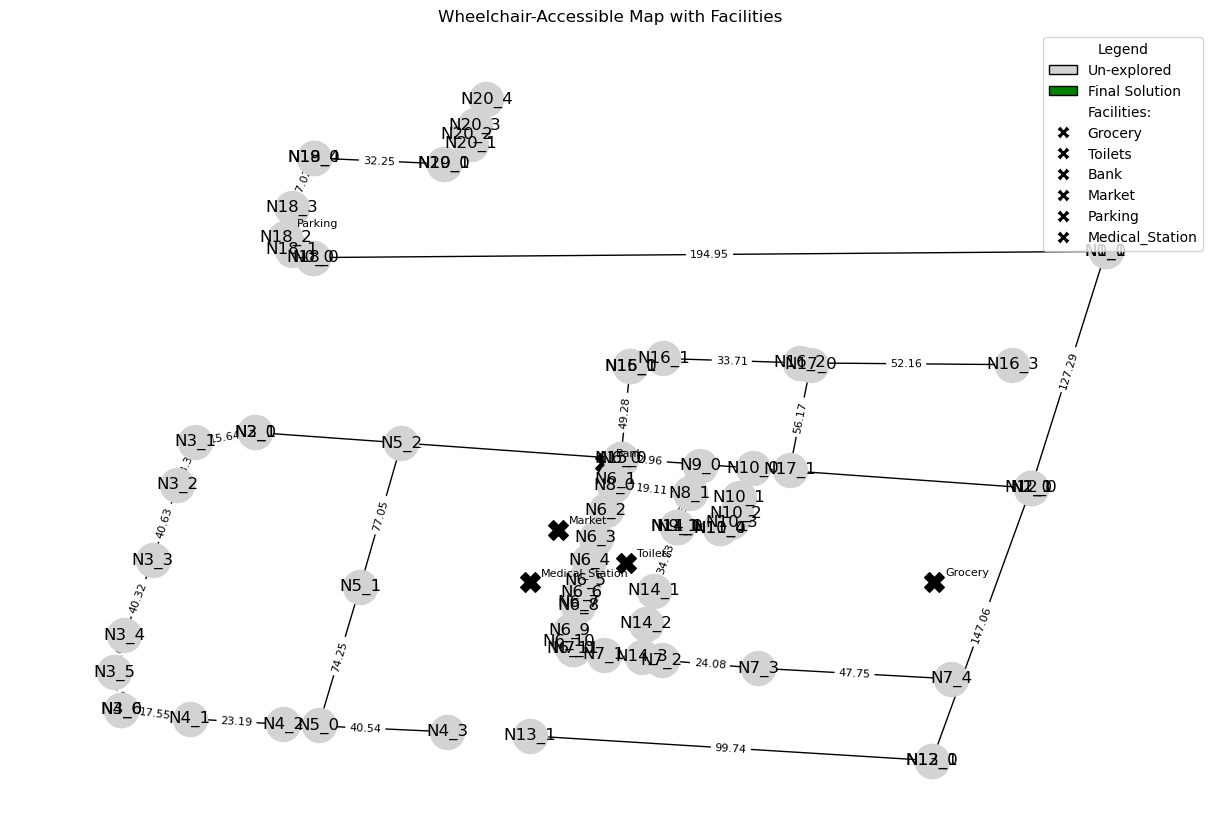

In [323]:

# Call the function to display the map
show_map(graph, coord_map, facilities)


## Task 2: A* Pathfinding on 20 Segment Map

In [324]:
# -------------------------------------
# Node Class
# -------------------------------------
class Node:
    def __init__(self, state, parent=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.path_cost = path_cost

    def solution(self):
        path = []
        current = self
        while current:
            path.append(current.state)
            current = current.parent
        return list(reversed(path))
# -------------------------------------
# Reconstruct path from goal to start
# -------------------------------------
def reconstruct_path(node):
    path = []
    while node:
        path.append(node.state)
        node = node.parent
    return path[::-1]

# -------------------------------------
# Haversine Heuristic
# -------------------------------------
def haversine(coord1, coord2):
    R = 6371  # Earth radius in km
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# -------------------------------------
# Basic Heuristic Wrapper (used for lambda)
# -------------------------------------
def basic_heuristic(n1, n2, coord_map):
    return haversine(coord_map[n1], coord_map[n2])

# -------------------------------------
# A* Search
# -------------------------------------
def astar_search(start, goal, graph, coordinates, heuristic_fn):
    frontier = PriorityQueue()
    start_node = Node(start, None, 0)
    frontier.put((heuristic_fn(start, goal), start_node))
    explored = set()
    cost_so_far = {start: 0}

    while not frontier.empty():
        _, current = frontier.get()

        if current.state == goal:
            return current

        explored.add(current.state)

        for neighbor, edge in graph.get(current.state, {}).items():
            cost = edge if isinstance(edge, float) else edge.get('distance', 1)
            new_cost = current.path_cost + cost
            if neighbor not in explored or new_cost < cost_so_far.get(neighbor, float('inf')):
                cost_so_far[neighbor] = new_cost
                child = Node(neighbor, current, new_cost)
                h = heuristic_fn(neighbor, goal)
                frontier.put((new_cost + h, child))

    return None



Path found: ['N6_0', 'N6_1', 'N6_2', 'N6_3', 'N6_4']
Total distance (km): 0.054619985407098295


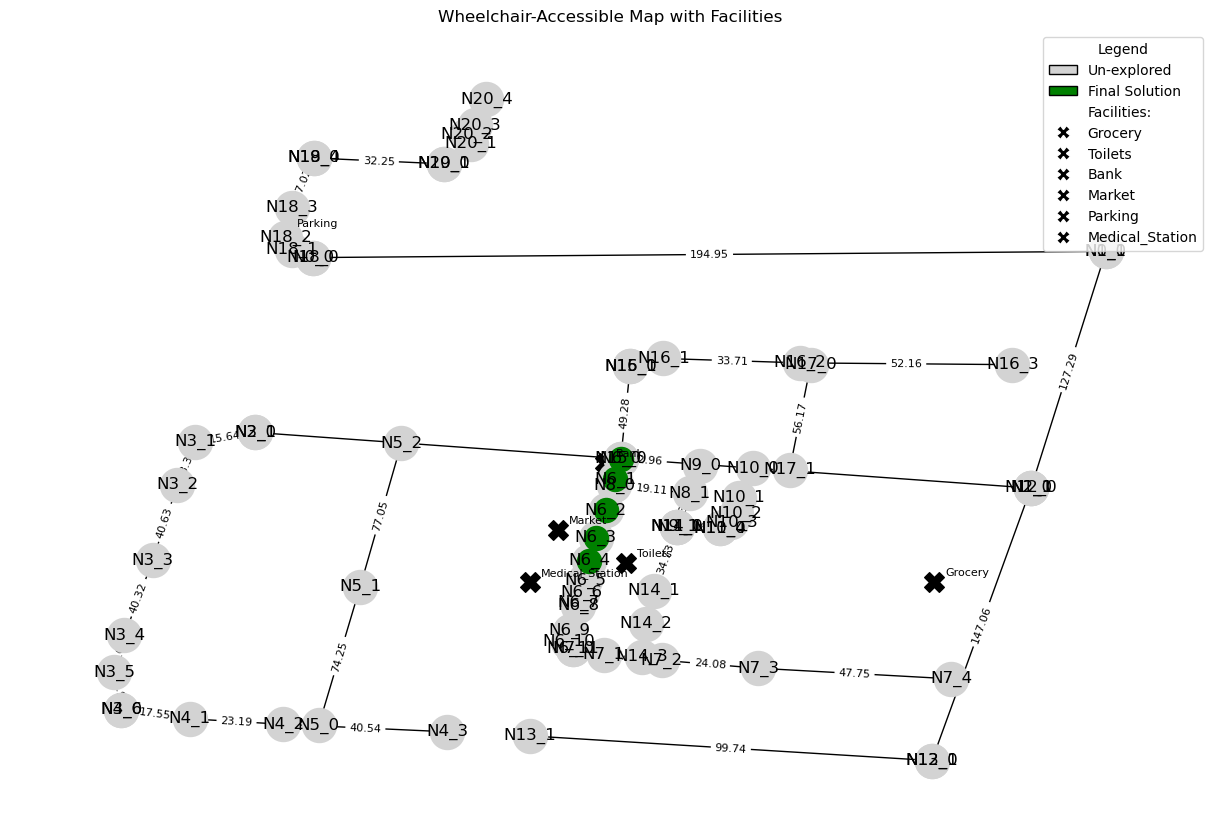

In [325]:
# -------------------------------------
# Run Example
# -------------------------------------
result = astar_search(
    'N6_0',
    'N6_4',
    graph,
    coord_map,
    heuristic_fn=lambda n1, n2: haversine(coord_map[n1], coord_map[n2])
)

if result:
    path = result.solution()
    print("Path found:", path)
    print("Total distance (km):", result.path_cost)

    show_map(
        graph,
        coord_map,
        path=path,
        facilities=facilities
    )
else:
    print("No path found.")


In [326]:
# Coordinate map with graph nodes and facilities
coord_map = {
    'N0': (145.1269042, -37.874986),
    'N1': (145.1291197, -37.8749563),
    'N2': (145.1289105, -37.8760911),
    'N3': (145.1267432, -37.8758244),
    'N4': (145.1265749, -37.8758699),
    'N5': (145.1265246, -37.8760763),
    'N6': (145.1264562, -37.8764383),
    'N7': (145.1263771, -37.8767961),
    'N8': (145.1263483, -37.876975),
    'N9': (145.1263678, -37.8771539),
    'N10': (145.1265596, -37.8771973),
    'N11': (145.1268211, -37.8772238),
    'N12': (145.1272797, -37.8772598),
    'N13': (145.1269203, -37.8772281),
    'N14': (145.1270356, -37.8765654),
    'N15': (145.127151, -37.8758773),
    'N16': (145.1277641, -37.8759514),
    'N17': (145.1277487, -37.8760488),
    'N18': (145.1277225, -37.876197),
    'N19': (145.1276937, -37.8763304),
    'N20': (145.1276756, -37.8764384),
    'N21': (145.1276655, -37.8765326),
    'N22': (145.1276551, -37.8765945),
    'N23': (145.1276446, -37.8766424),
    'N24': (145.1276447, -37.8766564),
    'N25': (145.1276213, -37.8767761),
    'N26': (145.1276176, -37.8768274),
    'N27': (145.1276305, -37.8768615),
    'N28': (145.1277169, -37.8768891),
    'N29': (145.1278785, -37.8769167),
    'N30': (145.1281479, -37.8769548),
    'N31': (145.1286868, -37.8770058),
    'N32': (145.1277454, -37.8760784),
    'N33': (145.1279572, -37.8761166),
    'N34': (145.1279856, -37.8759854),
    'N35': (145.1279212, -37.8762754),
    'N36': (145.1281331, -37.875996),
    'N37': (145.1280942, -37.8761389),
    'N38': (145.1280855, -37.8762146),
    'N39': (145.1280731, -37.8762546),
    'N40': (145.1280419, -37.8762839),
    'N41': (145.1286336, -37.8773977),
    'N42': (145.1275098, -37.8772791),
    'N43': (145.127856, -37.876584),
    'N44': (145.1278341, -37.8767425),
    'N45': (145.1278229, -37.876901),
    'N46': (145.1277907, -37.8755079),
    'N47': (145.1278832, -37.8754698),
    'N48': (145.1282654, -37.8754909),
    'N49': (145.1288582, -37.8754994),
    'N50': (145.128295, -37.8754994),
    'N51': (145.128236, -37.8760033),
    'N52': (145.126844, -37.8749475),
    'N53': (145.1268268, -37.874892),
    'N54': (145.1268459, -37.8747473),
    'N55': (145.1269056, -37.8745085),
    'N56': (145.1272704, -37.8745368),
    'N57': (145.1273455, -37.8744415),
    'N58': (145.1273348, -37.8743965),
    'N59': (145.1273562, -37.8743516),
    'N60': (145.1273884, -37.8742277),
    'N61': (145.1286486, -37.8765474),
    'N62': (145.1277863, -37.8764595),
    'N63': (145.1277285, -37.8759725),
    'N64': (145.1275938, -37.876297),
    'N65': (145.1268602, -37.874798),
    'N66': (145.1275107, -37.8765468),
    'N67': (145.1284689, -37.878311),
    'N68': (145.1273531, -37.878178),
    'N69': (145.1274068, -37.8778265),
    'N70': (145.1281041, -37.8773396),
    'N71': (145.1281283, -37.8774158),
    'N72': (145.1280988, -37.8775767),
    'N73': (145.1280505, -37.8778223),
    'N74': (145.1274169, -37.8778006),
    'N75': (145.1275127, -37.877817),
    'N76': (145.1277152, -37.8778414),
    'N77': (145.1278748, -37.8778742),
    'N78': (145.1279627, -37.8778694),
    'N79': (145.1280012, -37.877867),
    'N80': (145.1277742, -37.8754807),
    'N81': (145.1274658, -37.8754489),
    'N82': (145.1271895, -37.8753833),
    'N83': (145.127211, -37.875178),
    'N84': (145.1275382, -37.8751187),
    'N85': (145.1271627, -37.8749832),
    'N86': (145.1272324, -37.875106),
    'N87': (145.1277907, -37.8754867),
    'N88': (145.1287778, -37.8763461),
    'N89': (145.1288421, -37.8761174),
    'N90': (145.1268375, -37.8748835),
    'N91': (145.1286869, -37.8749781),
    'N92': (145.128644, -37.8751094),
    'N93': (145.1277374, -37.8751094),
    'N94': (145.1276999, -37.8749908),
    'N95': (145.1276757, -37.8750755),
    'N96': (145.1290839, -37.8751347),
    'N97': (145.1287406, -37.8751644),
    'New_Facility': (145.12877, -37.87634),
    'Benefit_1': (145.12884, -37.87611),
    'Benefit_2': (145.12868, -37.877),
    'Benefit_3': (145.12683, -37.87488),
}


obstacles = [
    (145.12779, -37.87548),
    (145.12716, -37.87498),
    (145.12911, -37.87495),
    (145.12785, -37.87658),
]


# Facilities including new ones
facilities = {
    'Grocery': (145.12864, -37.87654),
    'Toilets': (145.12778, -37.87645),
    'Bank': (145.12772, -37.87597),
    'Market': (145.12759, -37.87629),
    'Parking': (145.12683, -37.87487),
    'Medical_Station': (145.12751, -37.87654),
    'New_Facility': (145.12877, -37.87634),
}

# Benefit points
benefits = {
    'Benefit_1': (145.12884, -37.87611),
    'Benefit_2': (145.12868, -37.877),
    'Benefit_3': (145.12683, -37.87488),
}

In [327]:
# ----------------------------------------
# Wheelchair-Accessible Pathfinding Graph
# ----------------------------------------
# This dictionary represents the environment as a graph for the navigation system.
# Each key is a node (e.g., 'N0'), and each value is a dictionary of neighboring nodes.
# Each edge (connection between nodes) includes:
# - distance: Geodesic distance in kilometers between nodes.
# - has_ramp: Boolean flag indicating whether a wheelchair ramp is present.
# - slope: Integer slope percentage between the nodes (higher = steeper).
# - surface: String indicating surface type (e.g., 'smooth' or 'rough').

graph = {
    "N0": {
        "N1": {
            "distance": 0.1944868556260823,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N52": {
            "distance": 0.006800464564700017,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N1": {
        "N0": {
            "distance": 0.1944868556260823,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N2": {
            "distance": 0.12751296708594964,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N2": {
        "N1": {
            "distance": 0.12751296708594964,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N3": {
            "distance": 0.1925234026624154,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N41": {
            "distance": 0.14730599405331826,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N3": {
        "N2": {
            "distance": 0.1925234026624154,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N4": {
            "distance": 0.015614247038413832,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N4": {
        "N3": {
            "distance": 0.015614247038413832,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N5": {
            "distance": 0.023371406230066536,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N5": {
        "N4": {
            "distance": 0.023371406230066536,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N6": {
            "distance": 0.04069779916465705,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N6": {
        "N5": {
            "distance": 0.04069779916465705,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N7": {
            "distance": 0.040386747583245244,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N7": {
        "N6": {
            "distance": 0.040386747583245244,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N8": {
            "distance": 0.02005273048890471,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N8": {
        "N7": {
            "distance": 0.02005273048890471,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N9": {
            "distance": 0.01996626259221164,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N9": {
        "N8": {
            "distance": 0.01996626259221164,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N10": {
            "distance": 0.017512221782699074,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N10": {
        "N9": {
            "distance": 0.017512221782699074,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N11": {
            "distance": 0.023140055866350918,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N11": {
        "N10": {
            "distance": 0.023140055866350918,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N12": {
            "distance": 0.04044955089853117,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N12": {
        "N11": {
            "distance": 0.04044955089853117,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N13": {
        "N14": {
            "distance": 0.07438052147416133,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N14": {
        "N13": {
            "distance": 0.07438052147416133,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N15": {
            "distance": 0.07718072989700324,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N15": {
        "N14": {
            "distance": 0.07718072989700324,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N16": {
        "N17": {
            "distance": 0.01091440646028641,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N46": {
            "distance": 0.04937018496524285,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N17": {
        "N16": {
            "distance": 0.01091440646028641,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N18": {
            "distance": 0.016638763745309527,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N18": {
        "N17": {
            "distance": 0.016638763745309527,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N19": {
            "distance": 0.015047244466064806,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N19": {
        "N18": {
            "distance": 0.015047244466064806,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N20": {
            "distance": 0.012113674758711857,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N20": {
        "N19": {
            "distance": 0.012113674758711857,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N21": {
            "distance": 0.010512007207637517,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N21": {
        "N20": {
            "distance": 0.010512007207637517,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N22": {
            "distance": 0.0069432298219324175,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N22": {
        "N21": {
            "distance": 0.0069432298219324175,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N23": {
            "distance": 0.0054053787671380395,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N23": {
        "N22": {
            "distance": 0.0054053787671380395,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N24": {
            "distance": 0.0015567537156512773,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N24": {
        "N23": {
            "distance": 0.0015567537156512773,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N25": {
            "distance": 0.013467558409519758,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N25": {
        "N24": {
            "distance": 0.013467558409519758,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N26": {
            "distance": 0.005713536287802678,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N26": {
        "N25": {
            "distance": 0.005713536287802678,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N27": {
            "distance": 0.003957182003142745,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N27": {
        "N26": {
            "distance": 0.003957182003142745,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N28": {
            "distance": 0.008180777406663077,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N28": {
        "N27": {
            "distance": 0.008180777406663077,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N29": {
            "distance": 0.014511807794150103,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N29": {
        "N28": {
            "distance": 0.014511807794150103,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N30": {
            "distance": 0.024021673560094475,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N30": {
        "N29": {
            "distance": 0.024021673560094475,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N31": {
            "distance": 0.0476377753957317,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N31": {
        "N30": {
            "distance": 0.0476377753957317,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N32": {
        "N33": {
            "distance": 0.019068925565812113,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N33": {
        "N32": {
            "distance": 0.019068925565812113,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N34": {
        "N35": {
            "distance": 0.03273818166306863,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N35": {
        "N34": {
            "distance": 0.03273818166306863,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N40": {
            "distance": 0.010635967964267927,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N43": {
            "distance": 0.03478865823545707,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N36": {
        "N37": {
            "distance": 0.016252434162269284,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N37": {
        "N36": {
            "distance": 0.016252434162269284,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N38": {
            "distance": 0.008452020777556867,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N38": {
        "N37": {
            "distance": 0.008452020777556867,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N39": {
            "distance": 0.00457901876357243,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N39": {
        "N38": {
            "distance": 0.00457901876357243,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N40": {
            "distance": 0.004256016618321137,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N40": {
        "N39": {
            "distance": 0.004256016618321137,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N35": {
            "distance": 0.010635967964267927,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N41": {
        "N2": {
            "distance": 0.14730599405331826,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N42": {
            "distance": 0.09951268634489323,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N67": {
            "distance": 0.10257798057114263,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N42": {
        "N41": {
            "distance": 0.09951268634489323,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N43": {
        "N35": {
            "distance": 0.03478865823545707,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N44": {
            "distance": 0.017728904003727293,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N44": {
        "N43": {
            "distance": 0.017728904003727293,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N45": {
            "distance": 0.017651789173981133,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N45": {
        "N44": {
            "distance": 0.017651789173981133,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N46": {
        "N16": {
            "distance": 0.04937018496524285,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N47": {
            "distance": 0.009157723342803098,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N47": {
        "N46": {
            "distance": 0.009157723342803098,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N48": {
            "distance": 0.033628164294296985,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N48": {
        "N47": {
            "distance": 0.033628164294296985,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N49": {
            "distance": 0.052039441565839985,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N49": {
        "N48": {
            "distance": 0.052039441565839985,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N50": {
        "N51": {
            "distance": 0.056269917201726624,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N51": {
        "N50": {
            "distance": 0.056269917201726624,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N52": {
        "N0": {
            "distance": 0.006800464564700017,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N53": {
            "distance": 0.006353290642654857,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N53": {
        "N52": {
            "distance": 0.006353290642654857,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N54": {
            "distance": 0.01617700683026971,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N54": {
        "N53": {
            "distance": 0.01617700683026971,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N55": {
            "distance": 0.02706543987180664,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N55": {
        "N54": {
            "distance": 0.02706543987180664,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N56": {
            "distance": 0.03217367252091341,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N56": {
        "N55": {
            "distance": 0.03217367252091341,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N57": {
            "distance": 0.01247976544993168,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N57": {
        "N56": {
            "distance": 0.01247976544993168,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N58": {
            "distance": 0.005091145865808509,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N58": {
        "N57": {
            "distance": 0.005091145865808509,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N59": {
            "distance": 0.005334296618998073,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N59": {
        "N58": {
            "distance": 0.005334296618998073,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N60": {
            "distance": 0.014063961948657923,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N60": {
        "N59": {
            "distance": 0.014063961948657923,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N67": {
        "N41": {
            "distance": 0.10257798057114263,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N68": {
            "distance": 0.09904198332560003,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N68": {
        "N67": {
            "distance": 0.09904198332560003,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N69": {
            "distance": 0.039368165060689776,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N69": {
        "N68": {
            "distance": 0.039368165060689776,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N74": {
            "distance": 0.0030132905867725117,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N70": {
        "N71": {
            "distance": 0.00873521968614447,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N71": {
        "N70": {
            "distance": 0.00873521968614447,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N72": {
            "distance": 0.018077643467583518,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N72": {
        "N71": {
            "distance": 0.018077643467583518,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N73": {
            "distance": 0.02763654167412656,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N73": {
        "N72": {
            "distance": 0.02763654167412656,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N79": {
            "distance": 0.006589980813171796,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N74": {
        "N69": {
            "distance": 0.0030132905867725117,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N75": {
            "distance": 0.008603712088376396,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N75": {
        "N74": {
            "distance": 0.008603712088376396,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N76": {
            "distance": 0.017979031378735758,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N76": {
        "N75": {
            "distance": 0.017979031378735758,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N77": {
            "distance": 0.01447487900773235,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N77": {
        "N76": {
            "distance": 0.01447487900773235,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N78": {
            "distance": 0.007733293604619457,
            "has_ramp": False,
            "slope": 7,
            "surface": "rough"
        }
    },
    "N78": {
        "N77": {
            "distance": 0.007733293604619457,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N79": {
            "distance": 0.0033896099406729554,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N79": {
        "N78": {
            "distance": 0.0033896099406729554,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N73": {
            "distance": 0.006589980813171796,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N80": {
        "N81": {
            "distance": 0.027298674020722787,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N81": {
        "N80": {
            "distance": 0.027298674020722787,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N82": {
            "distance": 0.02532451866280917,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N82": {
        "N81": {
            "distance": 0.02532451866280917,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N83": {
            "distance": 0.022906183223836165,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N83": {
        "N82": {
            "distance": 0.022906183223836165,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N84": {
            "distance": 0.0294661745694568,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N84": {
        "N83": {
            "distance": 0.0294661745694568,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N86": {
            "distance": 0.026877743047792734,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N85": {
        "N86": {
            "distance": 0.01496255673178819,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N86": {
        "N85": {
            "distance": 0.01496255673178819,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N84": {
            "distance": 0.026877743047792734,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N91": {
        "N92": {
            "distance": 0.015077640540060623,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N92": {
        "N91": {
            "distance": 0.015077640540060623,
            "has_ramp": False,
            "slope": 11,
            "surface": "rough"
        },
        "N93": {
            "distance": 0.07957392483180002,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N97": {
            "distance": 0.010454248432344552,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N93": {
        "N92": {
            "distance": 0.07957392483180002,
            "has_ramp": False,
            "slope": 5,
            "surface": "rough"
        },
        "N95": {
            "distance": 0.006598262631393399,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N94": {
        "N95": {
            "distance": 0.009654760539665698,
            "has_ramp": False,
            "slope": 6,
            "surface": "smooth"
        }
    },
    "N95": {
        "N94": {
            "distance": 0.009654760539665698,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        },
        "N93": {
            "distance": 0.006598262631393399,
            "has_ramp": True,
            "slope": 5,
            "surface": "smooth"
        }
    },
    "N96": {
        "N97": {
            "distance": 0.03031248376531902,
            "has_ramp": True,
            "slope": 5,
            "surface": "rough"
        }
    },
    "N97": {
        "N96": {
            "distance": 0.03031248376531902,
            "has_ramp": False,
            "slope": 5,
            "surface": "rough"
        },
        "N92": {
            "distance": 0.010454248432344552,
            "has_ramp": True,
            "slope": 5,
            "surface": "rough"
        }
    }
}

In [328]:
def enhanced_heuristic(coord1, coord2, slope=0, has_ramp=True, surface='smooth'):
    """
    Calculates an enhanced heuristic for A* pathfinding by incorporating accessibility factors.
    
    Parameters:
    - coord1, coord2: Tuples of (longitude, latitude) for two points.
    - slope: Slope percentage between the two points (default is 0).
    - has_ramp: Boolean indicating if a ramp is available (default is True).
    - surface: String describing the surface type (e.g., 'smooth', 'rough').

    Returns:
    - Adjusted heuristic distance (float) that considers accessibility difficulty.
    """

    # Step 1: Calculate base straight-line geodesic distance using Haversine formula
    base_dist = haversine(coord1, coord2)

    # Step 2: Apply slope penalty — higher slope increases difficulty
    slope_penalty = 1 + (slope / 10)  # e.g., slope of 10% results in 1 + 1 = 2x cost

    # Step 3: Apply ramp penalty — add penalty if no ramp is available
    ramp_penalty = 1.2 if not has_ramp else 1  # 20% extra cost for steps

    # Step 4: Apply surface penalty — rough surfaces are harder to traverse
    surface_penalty = {'smooth': 1, 'rough': 1.5}.get(surface, 1.2)  # default penalty for unknown types

    # Step 5: Combine all penalties with base distance to return final heuristic
    return base_dist * slope_penalty * ramp_penalty * surface_penalty


In [329]:
def astar_search_modified(start, goal, graph, coordinates, obstacles=None, use_enhanced=False):
    """
    A* Search Algorithm with optional enhanced heuristic for wheelchair-accessible navigation.

    Parameters:
    - start: Starting node ID (e.g., 'N0')
    - goal: Goal node ID (e.g., 'N60')
    - graph: Dictionary representing the weighted graph with optional metadata on each edge
    - coordinates: Dictionary mapping node IDs to (longitude, latitude) coordinates
    - obstacles: Optional list of nodes to avoid (e.g., construction zones)
    - use_enhanced: Boolean flag to toggle between basic (Haversine) and enhanced heuristic

    Returns:
    - Goal node if path is found (as Node object with parent linking back), otherwise None
    """

    # Inner function to compute heuristic based on the chosen mode
    def heuristic(n1, n2, edge_info=None):
        # Use basic haversine if enhanced mode is off or edge metadata is missing
        if not use_enhanced or edge_info is None:
            return haversine(coordinates[n1], coordinates[n2])
        
        # Use accessibility-aware heuristic with metadata
        return enhanced_heuristic(
            coordinates[n1], coordinates[n2],
            slope=edge_info.get('slope', 0),
            has_ramp=edge_info.get('has_ramp', True),
            surface=edge_info.get('surface', 'smooth')
        )

    # Priority queue (min-heap) ordered by f(n) = g(n) + h(n)
    frontier = PriorityQueue()
    start_node = Node(start, None, 0)
    h_start = heuristic(start, goal, None)
    frontier.put((h_start, start_node))

    explored = set()  # Tracks visited nodes
    cost_so_far = {start: 0}  # g(n): cost from start to current node
    obstacles = set(obstacles or [])  # Ensure obstacles is a set for fast lookup

    # Main loop: explore until the goal is found or queue is empty
    while not frontier.empty():
        _, current = frontier.get()

        # Goal test
        if current.state == goal:
            return current

        explored.add(current.state)

        # Explore neighbors
        for neighbor, edge in graph.get(current.state, {}).items():
            if neighbor in obstacles:
                continue  # Skip inaccessible nodes

            # Default cost: use distance if available, otherwise fallback to 1
            cost = edge if isinstance(edge, float) else edge.get('distance', 1)

            # Apply enhanced environmental penalties if in enhanced mode
            if use_enhanced and isinstance(edge, dict):
                slope = edge.get('slope', 0)
                has_ramp = edge.get('has_ramp', True)
                surface = edge.get('surface', 'smooth')

                # Apply slope penalty: cost increases with steepness
                cost *= (1 + slope / 10)

                # Apply ramp penalty: large penalty if no ramp is present
                if not has_ramp:
                    cost *= 1.5

                # Apply surface penalty: rough surfaces increase travel difficulty
                surface_penalty = {'smooth': 1, 'rough': 1.75}
                cost *= surface_penalty.get(surface, 1.2)

            # Total path cost to reach neighbor
            new_cost = current.path_cost + cost

            # Update cost if it's a better route to the neighbor
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                child = Node(neighbor, current, new_cost)

                # Calculate f(n) = g(n) + h(n)
                h = heuristic(neighbor, goal, edge if isinstance(edge, dict) else None)
                frontier.put((new_cost + h, child))

    # If goal was not reached
    return None


In [330]:
def show_map_modified(graph, coord_map, facilities, obstacles, benefits, path=None):
    G = nx.Graph()
    for node in graph:
        G.add_node(node, pos=coord_map[node])
        for neighbor, cost in graph[node].items():
            if isinstance(cost, dict):
                weight = cost.get('distance', 0) * 1000
            else:
                weight = cost * 1000
            G.add_edge(node, neighbor, weight=round(weight, 2))

    pos = nx.get_node_attributes(G, 'pos')
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=600)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green')
        path_edges = list(zip(path, path[1:]))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=DeprecationWarning)
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=2)

    # Plot facilities
    for facility, (x, y) in facilities.items():
        plt.scatter(x, y, marker='X', s=200, color='black')
        plt.text(x + 0.00003, y + 0.00003, facility, fontsize=8, color='black')

    # Plot obstacles
    for i, (x, y) in enumerate(obstacles):
        plt.scatter(x, y, marker='s', s=300, color='red', zorder=5)
        plt.text(x + 0.00003, y + 0.00003, f"Obstacle_{i+1}", fontsize=8, color='red')

    # Plot benefits
    for benefit, (x, y) in benefits.items():
        plt.scatter(x, y, marker='*', s=200, color='blue')
        plt.text(x + 0.00003, y + 0.00003, benefit, fontsize=8, color='blue')

    # Plot non-accessible nodes
    non_accessible_nodes = ['N81', 'N82', 'N83', 'N84', 'N86']
    for node in non_accessible_nodes:
        if node in coord_map:
            x, y = coord_map[node]
            plt.scatter(x, y, s=300, color='red', marker='o', edgecolors='black', zorder=6)
            plt.text(x + 0.00003, y + 0.00003, f"{node}\nNon-Accessible", fontsize=8, color='red')

    # Custom legend
    legend_elements = [
        Patch(facecolor='lightgray', edgecolor='black', label='Un-explored'),
        Patch(facecolor='green', edgecolor='black', label='Final Solution'),
        Patch(facecolor='none', edgecolor='none', label='Facilities:'),
        plt.Line2D([0], [0], marker='X', color='w', label='Facility', markerfacecolor='black', markersize=10),
        plt.Line2D([0], [0], marker='s', color='w', label='Obstacle', markerfacecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='*', color='w', label='Benefit', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Non-Accessible Node', markerfacecolor='red', markeredgecolor='black', markersize=10)
    ]

    plt.legend(handles=legend_elements, loc='upper right', title="Legend")
    plt.title("Wheelchair-Accessible Map with Facilities, Obstacles & Benefits")
    plt.axis('off')
    plt.show()


Path found: ['N0', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57', 'N58', 'N59', 'N60']
Total distance (km): 0.12553904431374083


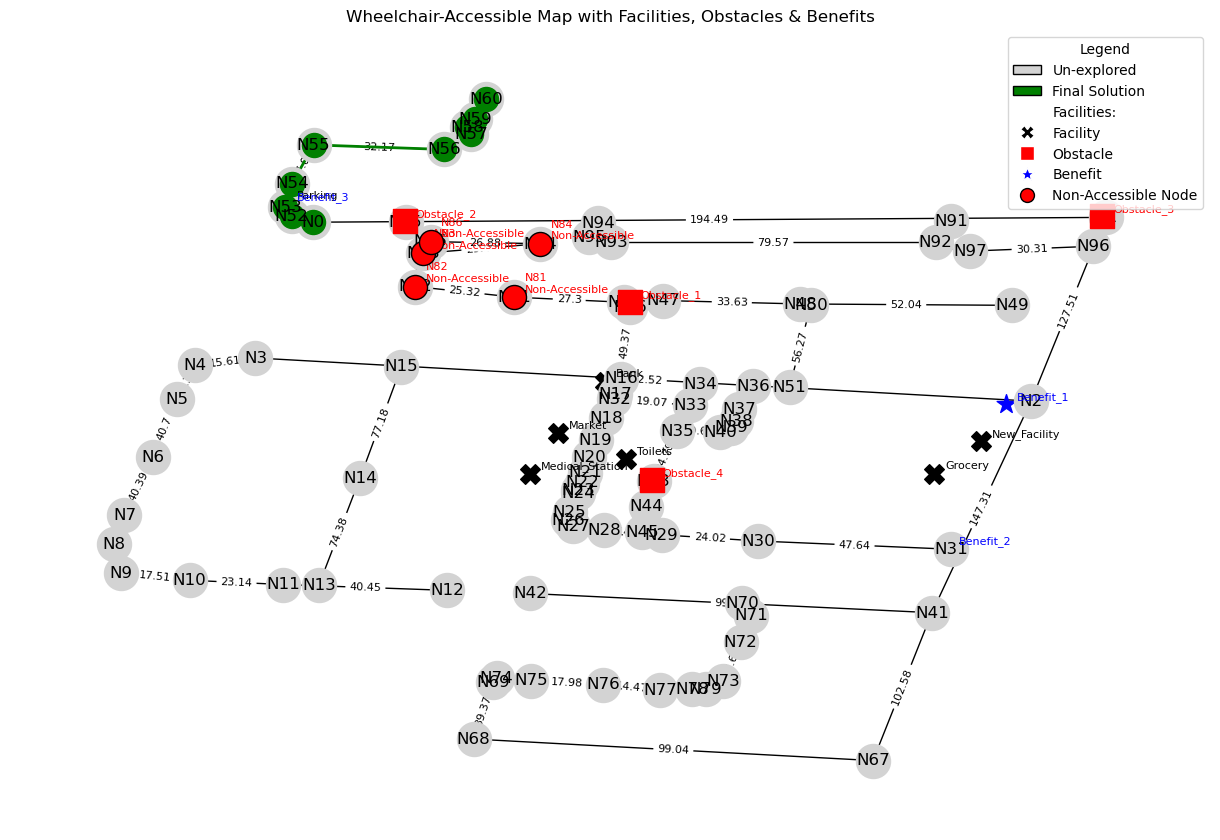

In [331]:
if __name__ == "__main__":
    # Define start and goal nodes for the pathfinding operation
    start, goal = 'N0', 'N60'

    # Run A* Search using the basic haversine heuristic
    result = astar_search(
        start,
        goal,
        graph,
        coord_map,
        heuristic_fn=lambda n1, n2: haversine(coord_map[n1], coord_map[n2])  # Basic straight-line heuristic
    )

    # If a path was found, extract and display it
    if result:
        path = result.solution()  # Retrieve the sequence of nodes from start to goal
        print("Path found:", path)
        print("Total distance (km):", result.path_cost)

        # Visualize the graph with the computed path and metadata
        show_map_modified(
            graph,        # The full navigation graph with edge metadata
            coord_map,    # Coordinates for drawing
            facilities,   # Facility markers (e.g., toilets, parking)
            obstacles,    # Obstacle zones (e.g., construction areas)
            benefits,     # Benefit points (e.g., shelters, rest stops)
            path=path     # The optimal path to highlight
        )
    else:
        # Fallback in case no valid path could be computed
        print("No path found.")


In [332]:
start = 'N0'
goal = 'N60'


# Run with basic heuristic
result_basic = astar_search(
    start, goal, graph, coord_map,
    heuristic_fn=lambda n1, n2: basic_heuristic(n1, n2, coord_map)
)

# Run with enhanced heuristic
result_enhanced = astar_search_modified(
    start, goal, graph, coord_map, obstacles,
    use_enhanced=True
)

# Output Results
if result_basic:
    print("\n--- Basic Heuristic ---")
    print("Path:", result_basic.solution())
    print("Total Distance (km):", round(result_basic.path_cost, 3))
else:
    print("Basic heuristic failed to find a path.")

if result_enhanced:
    print("\n--- Enhanced Heuristic ---")
    print("Path:", result_basic.solution())
    print("Total Distance (km):", round(result_enhanced.path_cost, 3))
else:
    print("Enhanced heuristic failed to find a path.")



--- Basic Heuristic ---
Path: ['N0', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57', 'N58', 'N59', 'N60']
Total Distance (km): 0.126

--- Enhanced Heuristic ---
Path: ['N0', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57', 'N58', 'N59', 'N60']
Total Distance (km): 0.188


In [333]:
def dijkstra_search(start, goal, graph):
    """
    Implements Dijkstra's Algorithm for shortest-path finding in a weighted graph.

    Parameters:
    - start: Starting node ID (e.g., 'N0')
    - goal: Goal node ID (e.g., 'N60')
    - graph: Dictionary representing the weighted graph. 
             Each edge may be a float (distance) or a dict with metadata including 'distance'.

    Returns:
    - A Node object containing the path to the goal, or None if no path found.
    """

    # Priority queue ordered by total cost from start (g(n))
    frontier = PriorityQueue()
    frontier.put((0, Node(start)))  # Start node with 0 cost

    explored = set()  # Set to track explored nodes
    cost_so_far = {start: 0}  # Stores the best known cost to each node

    # Main loop: continue until all reachable nodes are explored
    while not frontier.empty():
        cost, current = frontier.get()  # Get the node with the lowest cost

        # Goal test: if we've reached the destination, return the solution node
        if current.state == goal:
            return current

        explored.add(current.state)

        # Expand all valid neighbors of the current node
        for neighbor, edge in graph[current.state].items():
            # Get distance from the edge (handle both float and dict formats)
            distance = edge["distance"] if isinstance(edge, dict) else edge

            # Calculate new cost to reach this neighbor
            new_cost = current.path_cost + distance

            # If this path is better than previously known, update and push to frontier
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                child = Node(neighbor, current, new_cost)
                frontier.put((new_cost, child))

    # If goal not reached
    return None


In [334]:
start = 'N0'
goal = 'N60'

# Timings
start_time_astar = time.perf_counter()
result_astar = astar_search(start, goal, graph, coord_map,
                            heuristic_fn=lambda n1, n2: basic_heuristic(n1, n2, coord_map))
end_time_astar = time.perf_counter()
time_astar = end_time_astar - start_time_astar

start_time_enh = time.perf_counter()
result_enhanced = astar_search_modified(start, goal, graph, coord_map, obstacles=[], use_enhanced=True)
end_time_enh = time.perf_counter()
time_enh = end_time_enh - start_time_enh

start_time_dij = time.perf_counter()
result_dijkstra = dijkstra_search(start, goal, graph)
end_time_dij = time.perf_counter()
time_dij = end_time_dij - start_time_dij

# Results printout
def print_results(name, result, exec_time):
    if result:
        print(f"\n{name} Path: {result.solution()}")
        print(f"{name} Total Distance: {round(result.path_cost, 3)} km")
        print(f"{name} Execution Time: {exec_time:.6f} seconds")
    else:
        print(f"{name} failed to find a path.")

print_results("A*", result_astar, time_astar)
print_results("Enhanced A*", result_enhanced, time_enh)
print_results("Dijkstra", result_dijkstra, time_dij)


A* Path: ['N0', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57', 'N58', 'N59', 'N60']
A* Total Distance: 0.126 km
A* Execution Time: 0.000338 seconds

Enhanced A* Path: ['N0', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57', 'N58', 'N59', 'N60']
Enhanced A* Total Distance: 0.188 km
Enhanced A* Execution Time: 0.000297 seconds

Dijkstra Path: ['N0', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57', 'N58', 'N59', 'N60']
Dijkstra Total Distance: 0.126 km
Dijkstra Execution Time: 0.000218 seconds


## 📊 Result Interpretation

The results from our timing tests confirm the expected trade-offs:
- **Basic A\*** is fast and efficient for general routing, but may choose inaccessible paths.
- **Enhanced A\*** is slightly slower but yields safer, accessibility-aware routes.
- **Dijkstra** explores broadly and is useful for completeness, but can be slower on larger maps.


In [335]:
# Modify the plotting function to embed in GUI
def show_map_embedded(graph, coord_map, facilities, obstacles, benefits, path, container):
    G = nx.Graph()
    for node in graph:
        G.add_node(node, pos=coord_map[node])
        for neighbor, cost in graph[node].items():
            weight = cost.get("distance", 0) * 1000 if isinstance(cost, dict) else cost * 1000
            G.add_edge(node, neighbor, weight=round(weight, 2))

    pos = nx.get_node_attributes(G, "pos")
    edge_labels = nx.get_edge_attributes(G, "weight")

    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightgray", node_size=600, ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, ax=ax)

    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="green", ax=ax)
        path_edges = list(zip(path, path[1:]))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=DeprecationWarning)
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="green", width=2, ax=ax)

    for f, (x, y) in facilities.items():
        ax.scatter(x, y, marker='X', s=200, color='black')
        ax.text(x + 0.00003, y + 0.00003, f, fontsize=8, color='black')

    for i, (x, y) in enumerate(obstacles):
        ax.scatter(x, y, marker='s', s=300, color='red')
        ax.text(x + 0.00003, y + 0.00003, f"Obstacle_{i+1}", fontsize=8, color='red')

    for b, (x, y) in benefits.items():
        ax.scatter(x, y, marker='*', s=200, color='blue')
        ax.text(x + 0.00003, y + 0.00003, b, fontsize=8, color='blue')

    non_accessible_nodes = ['N81', 'N82', 'N83', 'N84', 'N86']
    for node in non_accessible_nodes:
        if node in coord_map:
            x, y = coord_map[node]
            ax.scatter(x, y, s=300, color='red', marker='o', edgecolors='black')
            ax.text(x + 0.00003, y + 0.00003, f"{node}\nNon-Accessible", fontsize=8, color='red')

    legend_elements = [
        Patch(facecolor='lightgray', edgecolor='black', label='Un-explored'),
        Patch(facecolor='green', edgecolor='black', label='Final Solution'),
        Patch(facecolor='none', edgecolor='none', label='Facilities:'),
        plt.Line2D([0], [0], marker='X', color='w', label='Facility', markerfacecolor='black', markersize=10),
        plt.Line2D([0], [0], marker='s', color='w', label='Obstacle', markerfacecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='*', color='w', label='Benefit', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Non-Accessible Node', markerfacecolor='red', markeredgecolor='black', markersize=10)
    ]

    ax.legend(handles=legend_elements, loc='upper right', title="Legend")
    ax.set_title("Wheelchair-Accessible Map with Facilities, Obstacles & Benefits")
    ax.axis('off')

    # Embed the matplotlib figure into the Tkinter container
    canvas = FigureCanvasTkAgg(fig, master=container)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)



In [336]:
def run_gui(graph, coord_map, facilities, obstacles, benefits):
    """
    Launches a Tkinter-based GUI for interactive wheelchair-accessible pathfinding.
    Supports Basic A*, Enhanced A*, and Dijkstra search algorithms.

    Parameters:
    - graph: Adjacency list of the environment with metadata.
    - coord_map: Dictionary of node coordinates for plotting.
    - facilities: Dictionary of facility locations.
    - obstacles: Set or list of obstacle nodes.
    - benefits: Dictionary of benefit point nodes.
    """

    def find_path(use_enhanced=False, use_dijkstra=False):
        """
        Triggered when the user clicks one of the algorithm buttons.
        Executes the selected pathfinding algorithm and displays the result.
        """
        start = entry_start.get()
        goal = entry_goal.get()

        # Input validation
        if start not in graph or goal not in graph:
            messagebox.showerror("Error", "Invalid start or goal node!")
            return

        start_time = time.perf_counter()  # Time tracking start

        # Choose algorithm based on user selection
        if use_dijkstra:
            result = dijkstra_search(start, goal, graph)
            method = "Dijkstra"
        elif use_enhanced:
            result = astar_search_modified(start, goal, graph, coord_map, obstacles, use_enhanced=True)
            method = "Enhanced A*"
        else:
            result = astar_search(start, goal, graph, coord_map,
                                  heuristic_fn=lambda n1, n2: basic_heuristic(n1, n2, coord_map))
            method = "Basic A*"

        end_time = time.perf_counter()  # Time tracking end
        elapsed_time = end_time - start_time

        # Display the result
        if result:
            path = result.solution()
            distance = round(result.path_cost, 3)
            output_text.set(
                f"{method} Path: {path}\nDistance: {distance} km\nTime: {elapsed_time:.6f} seconds"
            )

            # Clear previous graph visualization (if any)
            for widget in graph_frame.winfo_children():
                widget.destroy()

            # Render the new path using embedded matplotlib graph
            show_map_embedded(graph, coord_map, facilities, obstacles, benefits, path, graph_frame)
        else:
            output_text.set(f"{method} failed to find a path.")

    # Initialize main window
    window = tk.Tk()
    window.title("Wheelchair-Accessible Pathfinding")

    # Input fields for start and goal node
    tk.Label(window, text="Start Node:").grid(row=0, column=0)
    entry_start = tk.Entry(window)
    entry_start.grid(row=0, column=1)

    tk.Label(window, text="Goal Node:").grid(row=1, column=0)
    entry_goal = tk.Entry(window)
    entry_goal.grid(row=1, column=1)

    # Buttons to trigger each search method
    tk.Button(window, text="Run A* (Basic)", command=lambda: find_path(use_enhanced=False)).grid(row=2, column=0, pady=10)
    tk.Button(window, text="Run A* (Enhanced)", command=lambda: find_path(use_enhanced=True)).grid(row=2, column=1, pady=10)
    tk.Button(window, text="Run Dijkstra", command=lambda: find_path(use_dijkstra=True)).grid(row=2, column=2, pady=10)

    # Output label to show results: path, distance, execution time
    output_text = tk.StringVar()
    tk.Label(window, textvariable=output_text, fg="blue", wraplength=500, justify="left").grid(row=3, column=0, columnspan=3)

    # Frame to hold matplotlib visualization of the graph
    global graph_frame
    graph_frame = tk.Frame(window)
    graph_frame.grid(row=4, column=0, columnspan=3, padx=10, pady=10)

    # Start the GUI loop
    window.mainloop()


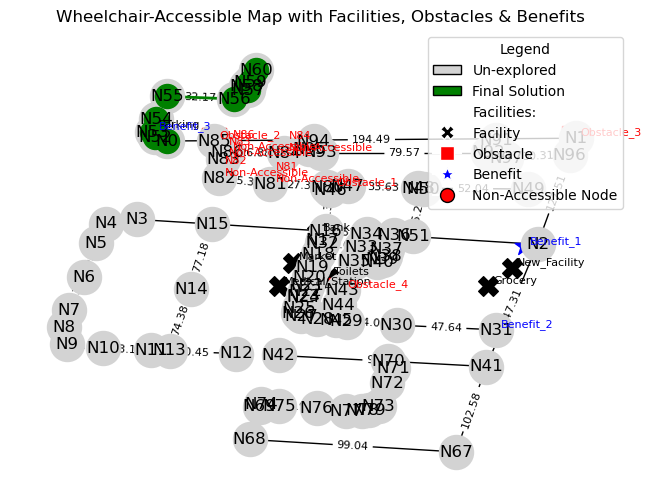

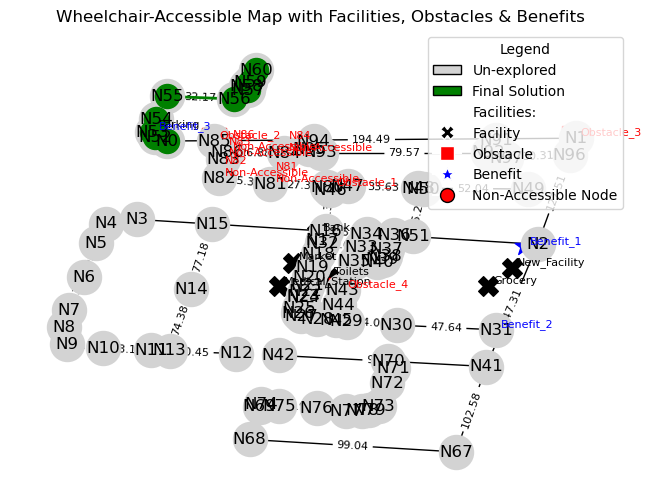

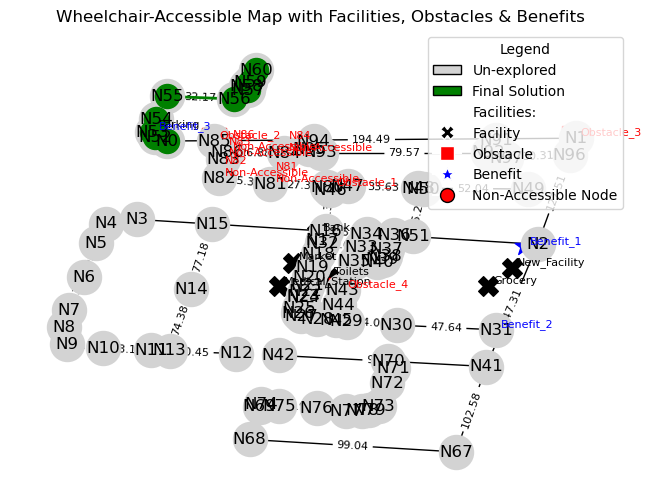

In [337]:
run_gui(graph, coord_map, facilities, obstacles, benefits)


## 🖱️ Interactive Pathfinding GUI

Use the interface below to select a start and goal node, and compare pathfinding results across three algorithms:
- Basic A*
- Enhanced A*
- Dijkstra

The system shows the computed path, total distance, and execution time, with visual feedback on the map.
